Innitialization

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import HourLocator, DateFormatter
sns.set(style="whitegrid")

combined_df = pd.read_csv('data/combined_search_logs.csv')
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])


# Verify the loaded data
print("\nFirst few rows:")
display(combined_df.head())


First few rows:


,Timestamp,#Images,UA,Ad,ISP,Province,PageType,Tnet,Tserver,Tbrowser,Tother,SRT
0,2014-09-21 16:00:00,37,MSIE 8+,noAD,CHINANET,Zhejiang,async,371.0,97.0,251.0,223.0,942.0
1,2014-09-21 16:00:00,12,MSIE 8+,noAD,CHINANET,Zhejiang,async,67.0,506.0,155.0,257.0,985.0
2,2014-09-21 16:00:00,24,Chrome,noAD,CMNET,Jiangsu,async,90.0,228.0,33.0,799.0,1150.0
3,2014-09-21 16:00:00,18,MSIE 8+,noAD,OTHER,Beijing,async,30.0,132.0,25.0,46.0,233.0
4,2014-09-21 16:00:00,13,Chrome,noAD,UNICOM,Beijing,async,29.0,491.0,28.0,46.0,594.0


Calculate the average SRT of every 10 minutes, and plot the SRT with a line chart (x axis for date time and y axis for the average SRT).

Average SRT every 10 minutes (first few rows):


,Timestamp,SRT
0,2014-09-21 16:00:00,906.536375
1,2014-09-21 16:10:00,895.643628
2,2014-09-21 16:20:00,876.467753
3,2014-09-21 16:30:00,892.630692
4,2014-09-21 16:40:00,874.951058


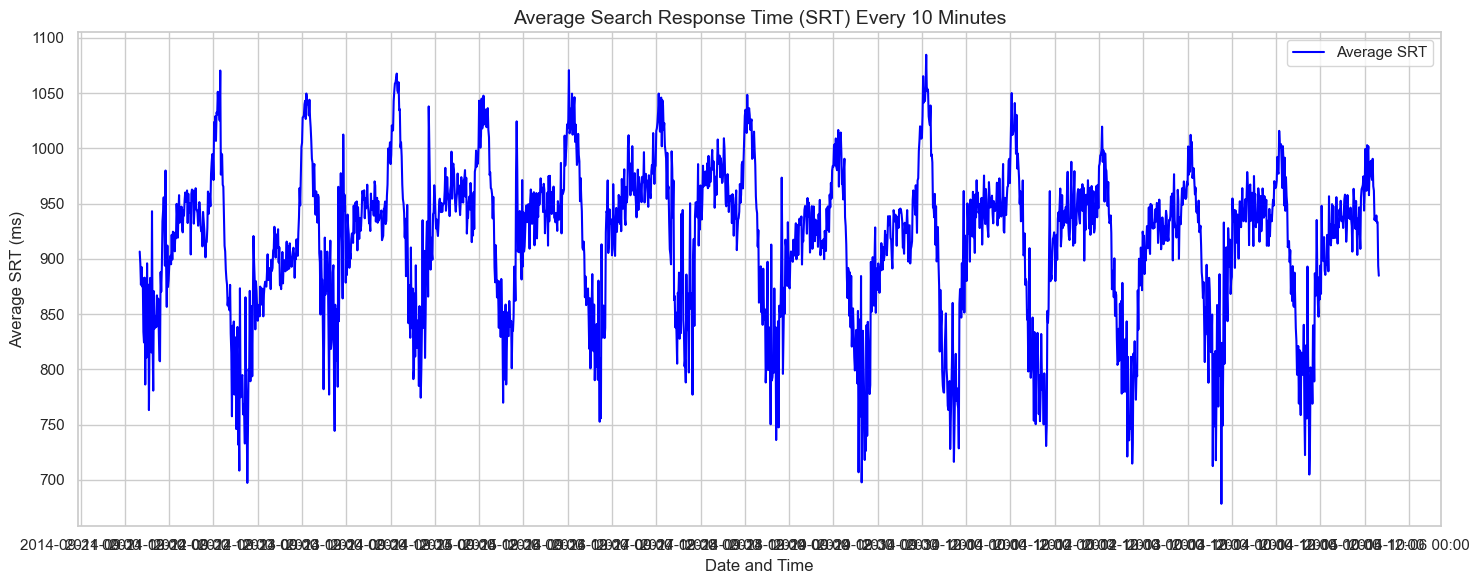

In [ ]:
# Set Timestamp as index for resampling
combined_df.set_index('Timestamp', inplace=True)

# Resample to 10-minute intervals and calculate mean SRT
srt_10min = combined_df['SRT'].resample('10min').mean()

# Reset index for plotting
srt_10min = srt_10min.reset_index()

# Display sample of resampled data
print("Average SRT every 10 minutes (first few rows):")
display(srt_10min.head())



# Create the line chart
plt.figure(figsize=(15, 6))

# Plot the data
plt.plot(srt_10min['Timestamp'], srt_10min['SRT'], label='Average SRT', color='blue')
plt.title('Average Search Response Time (SRT) Every 10 Minutes', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Average SRT (ms)', fontsize=12)


plt.gca().xaxis.set_major_locator(HourLocator(byhour=[0, 12]))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))

plt.legend()
plt.tight_layout()
plt.show()



Plot the four SRT components together with a stacked area chart (x axis for date time and y axis for time)

Average SRT components every 10 minutes (first few rows):


,Timestamp,Tnet,Tserver,Tbrowser,Tother
0,2014-09-21 16:00:00,240.866494,231.211210,113.980551,320.478120
1,2014-09-21 16:10:00,234.484759,227.134765,107.037701,326.986403
2,2014-09-21 16:20:00,207.013556,227.753990,116.294969,325.405238
3,2014-09-21 16:30:00,223.563776,223.181509,110.717230,335.168178
4,2014-09-21 16:40:00,236.600108,225.313283,110.222422,302.815247



Missing values in resampled data:
Timestamp    0
Tnet         0
Tserver      0
Tbrowser     0
Tother       0
dtype: int64


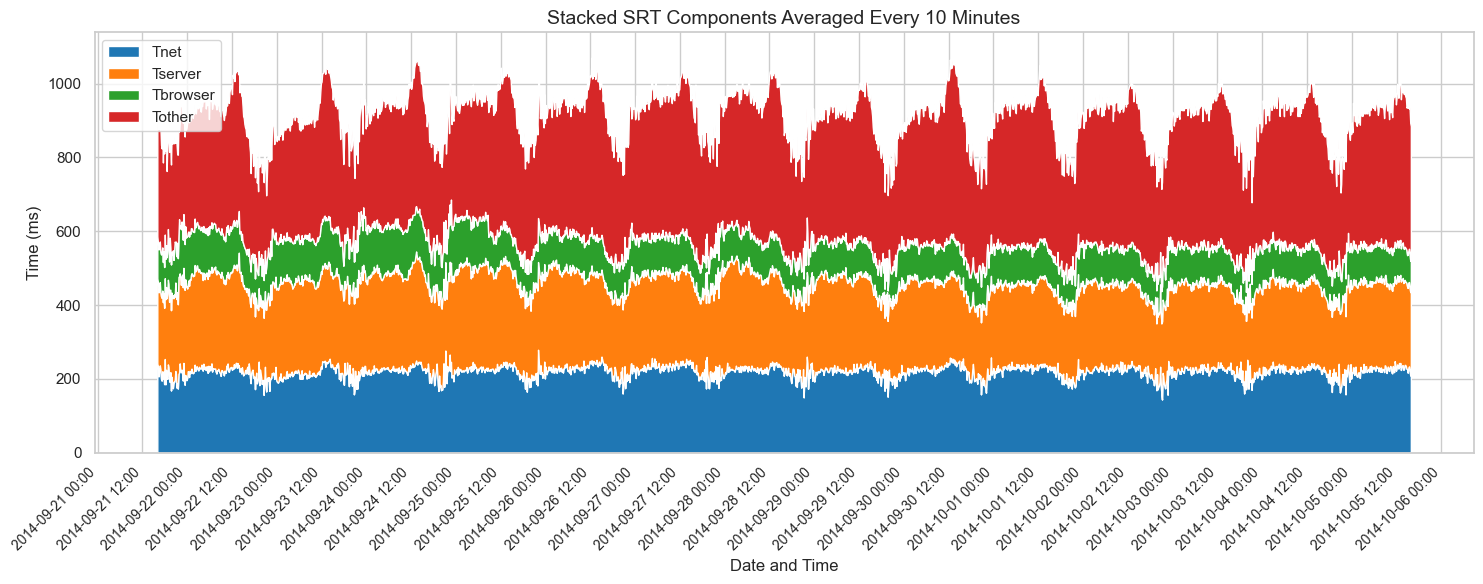

In [ ]:
# Set Timestamp as index for resampling
combined_df.set_index('Timestamp', inplace=True)

# Resample to 10-minute intervals and calculate mean for each SRT component
srt_components_10min = combined_df[['Tnet', 'Tserver', 'Tbrowser', 'Tother']].resample('10min').mean()

# Reset index for plotting
srt_components_10min = srt_components_10min.reset_index()

# Display sample of resampled data
print("Average SRT components every 10 minutes (first few rows):")
display(srt_components_10min.head())



# Create the stacked area chart
plt.figure(figsize=(15, 6))

plt.stackplot(srt_components_10min['Timestamp'], 
              srt_components_10min['Tnet'], 
              srt_components_10min['Tserver'], 
              srt_components_10min['Tbrowser'], 
              srt_components_10min['Tother'],
              labels=['Tnet', 'Tserver', 'Tbrowser', 'Tother'],
              colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']) 

# Customize the plot
plt.title('Stacked SRT Components Averaged Every 10 Minutes', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Time (ms)', fontsize=12)

plt.gca().xaxis.set_major_locator(HourLocator(byhour=[0, 12]))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha='right', fontsize=10)


plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Plot the four SRT components together with a 100% stacked area chart (y axis for the percentage).


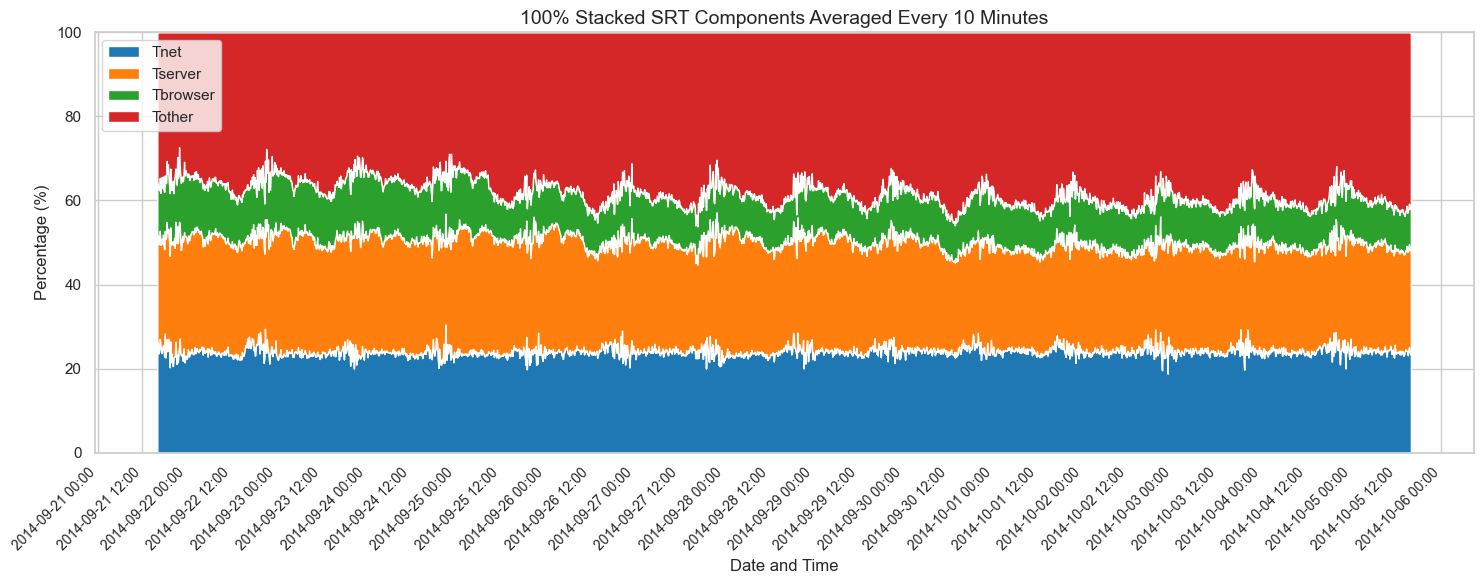

In [ ]:
# Calculate percentages for each component
total_srt = srt_components_10min[['Tnet', 'Tserver', 'Tbrowser', 'Tother']].sum(axis=1)
srt_percentages = srt_components_10min[['Tnet', 'Tserver', 'Tbrowser', 'Tother']].div(total_srt, axis=0) * 100

# Create the 100% stacked area chart
plt.figure(figsize=(15, 6))

# Plot stacked areas (percentages)
plt.stackplot(srt_components_10min['Timestamp'], 
              srt_percentages['Tnet'], 
              srt_percentages['Tserver'], 
              srt_percentages['Tbrowser'], 
              srt_percentages['Tother'],
              labels=['Tnet', 'Tserver', 'Tbrowser', 'Tother'],
              colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Customize the plot
plt.title('100% Stacked SRT Components Averaged Every 10 Minutes', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.gca().xaxis.set_major_locator(HourLocator(byhour=[0, 12]))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()